In [ ]:
!pip install squarify

In [ ]:
!pip install mpl_extra

ERROR: Could not find a version that satisfies the requirement mpl_extra (from versions: none)
ERROR: No matching distribution found for mpl_extra


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('causes.csv')
df

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007.0
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007.0
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007.0
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007.0
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007.0
...,...,...,...,...,...,...
133307,Diabetes mellitus,Deaths - Diabetes mellitus - Sex: Both - Age: ...,589.0,Norway,NOR,1994.0
133308,Poisonings,Deaths - Poisonings - Sex: Both - Age: All Age...,11.0,Norway,NOR,1994.0
133309,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,7.0,Norway,NOR,1994.0
133310,Terrorism (deaths),Deaths - Terrorism (deaths) ---,0.0,Norway,NOR,1994.0


In [ ]:
numbers = df.groupby('Causes name').sum()["Death Numbers"].reset_index().sort_values(by="Death Numbers", ascending=False, ignore_index=True)
numbers

,Causes name,Death Numbers
0,Cardiovascular diseases,353464530.0
1,Neoplasms,195321852.0
2,Chronic respiratory diseases,94669755.0
3,Lower respiratory infections,71380181.0
4,Neonatal disorders,61903379.0
5,Diarrheal diseases,57983558.0
6,Digestive diseases,56932964.0
7,Tuberculosis,37071394.0
8,Cirrhosis and other chronic liver diseases,32300224.0
9,Road injuries,31605728.0


In [ ]:
total = numbers["Death Numbers"].sum()
d1 = numbers["Death Numbers"][0]/total
d1

0.29022269823521024

In [ ]:
labels = [f'{round(deaths/total*100,1)}% {cause}' for cause,
        deaths in zip(numbers['Causes name'],
        numbers['Death Numbers'])]
labels[0] = str(round(numbers["Death Numbers"][0]/total*100,1)) + "% died from " + numbers['Causes name'][0]
labels

['29.0% died from Cardiovascular diseases',
 '16.0% Neoplasms',
 '7.8% Chronic respiratory diseases',
 '5.9% Lower respiratory infections',
 '5.1% Neonatal disorders',
 '4.8% Diarrheal diseases',
 '4.7% Digestive diseases',
 '3.0% Tuberculosis',
 '2.7% Cirrhosis and other chronic liver diseases',
 '2.6% Road injuries',
 '2.3% Diabetes mellitus',
 '2.2% Chronic kidney disease',
 "2.1% Alzheimer's disease and other dementias",
 '1.8% HIV/AIDS',
 '1.7% Malaria',
 '1.6% Self-harm',
 '1.0% Interpersonal violence',
 '1.0% Nutritional deficiencies',
 '0.9% Protein-energy malnutrition',
 '0.7% Drowning',
 '0.7% Meningitis',
 '0.5% Maternal disorders',
 "0.5% Parkinson's disease",
 '0.3% Alcohol use disorders',
 '0.3% Acute hepatitis',
 '0.2% Fire, heat, and hot substances',
 '0.2% Drug use disorders',
 '0.2% Poisonings',
 '0.1% Conflict and terrorism',
 '0.1% Exposure to forces of nature',
 '0.1% Environmental heat and cold exposure',
 '0.0% Terrorism (deaths)',
 '0.0% Number of executions (Am

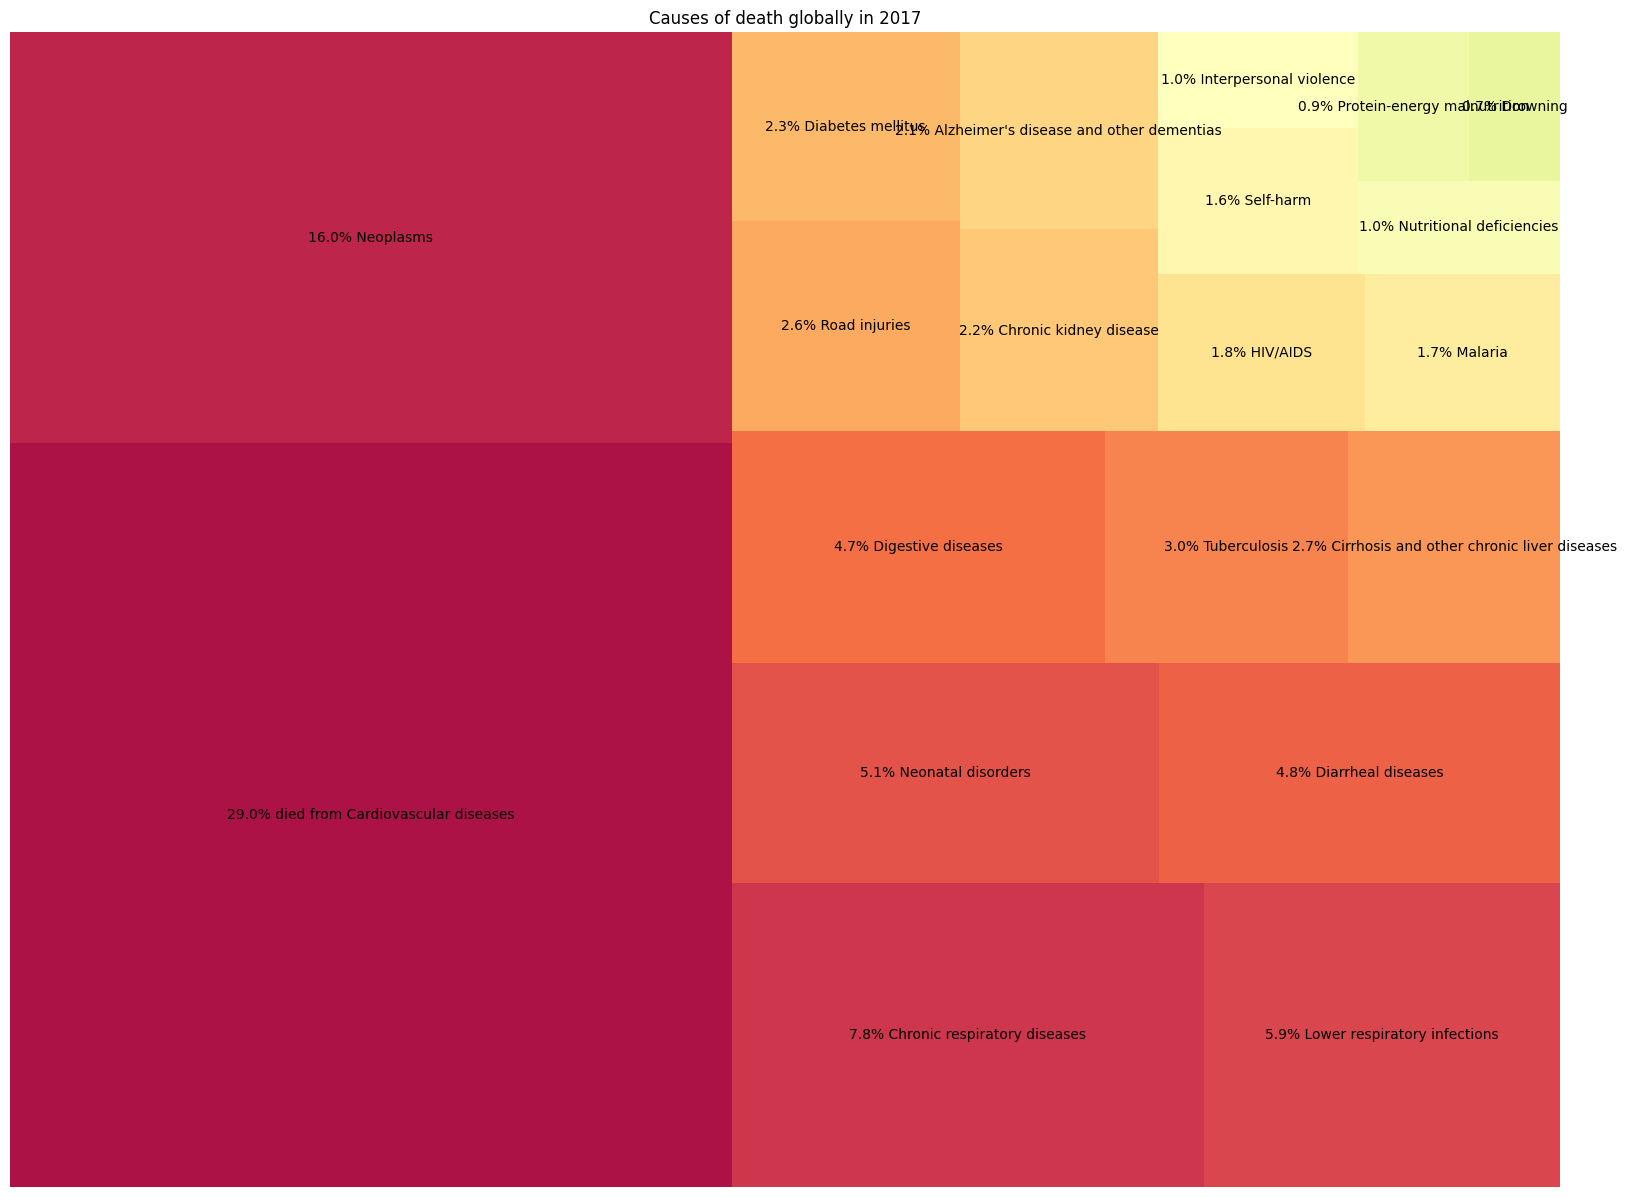

In [ ]:
plt.figure(figsize=(20, 15))
plt.axis("off")

squarify.plot(numbers["Death Numbers"][:20], label=labels[:20],
              color=sb.color_palette("Spectral",
                                     len(numbers["Causes name"])))
plt.title("Causes of death globally in 2017")
plt.show()

In [ ]:
death_rate = pd.read_csv('death-rate.csv')
death_rate

,Entity,Code,Year,Age-standardized death rate from cardiovascular diseases among both sexes
0,Afghanistan,AFG,2000,696.05510
1,Afghanistan,AFG,2001,702.28590
2,Afghanistan,AFG,2002,692.65076
3,Afghanistan,AFG,2003,681.37740
4,Afghanistan,AFG,2004,675.17290
...,...,...,...,...
4417,Zimbabwe,ZWE,2017,361.24330
4418,Zimbabwe,ZWE,2018,364.30536
4419,Zimbabwe,ZWE,2019,352.93920
4420,Zimbabwe,ZWE,2020,379.96840


In [ ]:
import plotly.graph_objects as go
import plotly.express as px


In [ ]:
year = 2020
df_filtered = death_rate[death_rate["Year"] == year]

# Create a choropleth map
fig = px.choropleth(
    df_filtered,
    locations="Code",
    locationmode="ISO-3",
    color="Age-standardized death rate from cardiovascular diseases among both sexes",
    hover_name="Entity",
    color_continuous_scale="Reds",
    title=f"Cardiovascular Disease Death Rate in {year}",
)
fig.update_geos(fitbounds="locations", visible=False)

# Show the map
fig.show()

In [ ]:
rf = pd.read_csv("risk-factor.csv")
rf

,measure,location,sex,age,cause,rei,metric,year,val,upper,lower
0,Deaths,Global,Both,All ages,Cardiovascular diseases,Air pollution,Number,1990,3.325404e+06,3860662.775,2.815934e+06
1,Deaths,Global,Both,All ages,Cardiovascular diseases,Air pollution,Number,1991,3.371918e+06,3952269.217,2.843904e+06
2,Deaths,Global,Both,All ages,Cardiovascular diseases,Air pollution,Number,1992,3.442579e+06,4003653.479,2.893216e+06
3,Deaths,Global,Both,All ages,Cardiovascular diseases,Air pollution,Number,1993,3.538616e+06,4085410.329,3.011344e+06
4,Deaths,Global,Both,All ages,Cardiovascular diseases,Air pollution,Number,1994,3.612317e+06,4170647.307,3.067401e+06
...,...,...,...,...,...,...,...,...,...,...,...
443,Deaths,Global,Both,All ages,Cardiovascular diseases,Low temperature,Number,2017,9.685068e+05,1074972.100,8.695723e+05
444,Deaths,Global,Both,All ages,Cardiovascular diseases,Low temperature,Number,2018,9.814578e+05,1101413.421,8.745028e+05
445,Deaths,Global,Both,All ages,Cardiovascular diseases,Low temperature,Number,2019,1.001831e+06,1122487.868,8.900908e+05
446,Deaths,Global,Both,All ages,Cardiovascular diseases,Low temperature,Number,2020,1.015395e+06,1138576.011,8.992773e+05


In [ ]:
year = 2021
df_filtered = rf[rf['year'] == year]

# Calculate error bars (upper - val and val - lower)
df_filtered.loc[:, 'upper_error'] = df_filtered['upper'] - df_filtered['val']
df_filtered.loc[:, 'lower_error'] = df_filtered['val'] - df_filtered['lower']
df_filtered = df_filtered.sort_values(by="val", ascending=True)

fig = px.bar(
    df_filtered,
    y="rei",
    x="val",
    orientation="h",
    error_x="upper_error",  # Error bars
    error_x_minus="lower_error",
    title=f"Number of deaths from cardiovascular diseases by risk factor, World, {year}",
    labels={"rei": "Risk Factor (rei)", "val": "Value"},
    color="val",
    color_continuous_scale="redor",
    animation_frame="year"
)

# Show the figure
fig.show()

In [ ]:
df = pd.read_csv('cardio_train.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df['cardio'], test_size=0.2, random_state=42)
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47339,21876,1,154,80.0,130,90,2,1,0,0,1
67456,16717,2,162,70.0,140,90,1,1,0,0,0
12308,21128,2,174,92.0,150,100,1,1,0,0,1
32557,23366,2,173,76.0,120,82,1,1,0,0,1
664,20281,1,160,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,16001,2,170,75.0,150,80,1,1,1,0,1
6265,23209,2,162,73.0,160,90,1,1,0,0,1
54886,23589,1,169,74.0,120,80,1,1,0,0,1
860,18227,1,167,70.0,120,80,1,1,0,0,0


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test).round()
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6548571428571428


In [ ]:
test = np.array([[10992,2,180,69,100,80,1,2,0, 0, 0]])
test.shape

(1, 11)

In [ ]:
confidence = model.predict(test)
confidence

array([0.07199349])